In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/dict.txt.big

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import json
import csv
import re

from matplotlib.font_manager import fontManager
from wordcloud import WordCloud
from pytz import timezone
from tqdm import tqdm

--2024-01-09 14:11:13--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.139, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/97amq0d29j2ac1vnnr2g60u41gconqov/1704809475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=843bb807-b50f-4c6a-a542-c1f49f8ccf16 [following]
--2024-01-09 14:11:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/97amq0d29j2ac1vnnr2g60u41gconqov/1704809475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=843bb807-b50f-4c6a-a542-c1f49f8ccf16
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0k-9o-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

商品資料-2022_*.xlsx

In [ ]:
FILE_LIST = glob.glob('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/original datasets/商品資料-2022_*.xlsx')

ALL_CSV_DATA_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/商品資料-2022_all.csv'
UPDATED_ALL_CSV_DATA_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/商品資料-2022_all_updated.csv'
RECLASSIFY_ALL_CSV_DATA_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/商品資料-2022_all_reclassify.csv'
TIME_PERIOD_ALL_CSV_DATA_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/商品資料-2022_all_timeperiod.csv'

CATEGORIES_JSON_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/categories.json'

# Preprocessing0

## 合併所有商品資料

存到 *'/datasets/商品資料-2022_all.csv'*

## 重新分類的「書籍及雜誌期刊」

In [ ]:
df = pd.read_csv(RECLASSIFY_ALL_CSV_DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489374 entries, 0 to 489373
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              489374 non-null  int64 
 1   time            489374 non-null  object
 2   commodity_id    489374 non-null  int64 
 3   category        489374 non-null  object
 4   name            489374 non-null  object
 5   total_quantity  489374 non-null  int64 
 6   price           489374 non-null  int64 
 7   total_amount    489374 non-null  int64 
 8   大類              489374 non-null  object
 9   小類              489374 non-null  object
dtypes: int64(5), object(5)
memory usage: 37.3+ MB


In [ ]:
df['category'] = df['大類']

# 刪除「大類」和「小類」欄位
df = df.drop(['大類', '小類'], axis=1)

for name in df['name']:
    print(name)

Streaming output truncated to the last 5000 lines.
第 096 標 (4/27)劍蝦
(4/27)歐奇斯狗糧300G*1包
第 109 標 (4/27)
第 110 標 (4/27)
(4/27)凡蒂斯狗糧300g*1包
醃蛤蠣
第 021 標 (4/27)大黃魚*1(殺好1.2)
第 010 標 (4/27) 壽山石雕 10+1
第 36 標 (4/27)  4格美妝蛋 38元
(4/27)比例瑪格狗糧454G*1包
第 022 標 (4/27)大金鯧*2
8031夢田洋裝(福)
第 012 標 (4/27)白北魚 4片/組
(4/27)棒吉貓糧300G*1包
第 035 標 (4/27)泰國防蚊乳霜
第 098 標 (4/27)虎鰻(幫殺100)
第 085 標 長褲*1件(黑29腰) (4/27)
(4/27)呷霸貓400G*1包
第 003 標 (4/27)
第 026 標 (4/27) 終極密碼-刀(Lin JU YI)
第 099 標 (4/27)黑大目(幫殺100)
646(4259)-N2帽T
第 013 標 (4/27) 壽山石雕 0元起標 100/刀
第 024 標 (4/27)龍虎石斑*1(1斤上)
第 100 標 (4/27)黑大目(幫殺100)
D套43（8508）
第 019 標 (4/27)手鍊*1
第 025 標 (4/27)午魚*2(1.4)
第 007 標 (4/27)
第 8744 標 (4/27)牛裙
第 008 標 (4/27)
第 009 標 (4/27)
第 016 標 (4/27) 壽山石雕 16+1
第 038 標 (4/27)下午場 牛樟樹榴帶鳳梨花(C5667) 第七個
晶 0427 -彌勒玉牌$1
B-181262福
第 041 標 (4/27)06022
B-42098004福
第 042 標 (4/27)01040(灰)
第 103 標 (4/27)赤殼(幫殺100)
B-5129B福
第 017 標 (4/27)  壽山石雕  17+1
第 010 標 (4/27)
59  鬆緊中長裙
第 8749 標 (4/27)黑西褲
第 043 標 (4/27)00616
公主 0427 A02-(預購/免運)醫療級冰火循環治療被(180x200cm)*4
B-51

In [ ]:
# 初始化空的DataFrame
combined_df = pd.DataFrame()

# 儲存每個月份的商品數量
monthly_counts = {}

# 將xlsx轉換成csv
for file_path in FILE_LIST:
    if '商品資料' in file_path:
        # 取得文件名稱（不含副檔名）
        file_name = file_path.split('/')[-1].split('.')[0]
        print(file_name)

        month = file_name.split('_')[-1].split('.')[0]

        # 讀取Excel文件
        df = pd.read_excel(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        monthly_counts[month] = len(df)  # 假設資料的數量即為商品數量

商品資料-2022_03
商品資料-2022_05
商品資料-2022_08
商品資料-2022_10
商品資料-2022_12
商品資料-2022_11
商品資料-2022_09
商品資料-2022_07
商品資料-2022_06
商品資料-2022_01
商品資料-2022_04
商品資料-2022_02


In [ ]:
combined_df = pd.read_csv(ALL_CSV_DATA_PATH)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713701 entries, 0 to 3713700
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              int64 
 1   time            object
 2   commodity_id    int64 
 3   name            object
 4   total_quantity  int64 
 5   price           int64 
 6   total_amount    int64 
 7   category        object
dtypes: int64(5), object(3)
memory usage: 226.7+ MB


In [ ]:
merged_data = pd.merge(combined_df, df[['id', 'category']], on='id', how='left')

# 將 combined_df 的 category 欄位更新為重新分類過後的值
merged_data['category'] = merged_data['category_y'].fillna(merged_data['category_x'])

# 刪除多餘的欄位，如果有需要
merged_data = merged_data.drop(['category_x', 'category_y'], axis=1)

# 將合併後的資料框重新命名為 merged_data
merged_data = merged_data.rename(columns={'category': 'category'})

In [ ]:
# 寫入合併後的數據到一個CSV文件
merged_data.to_csv(ALL_CSV_DATA_PATH, index=False)

## [圖表] 各月份商品總數長條圖

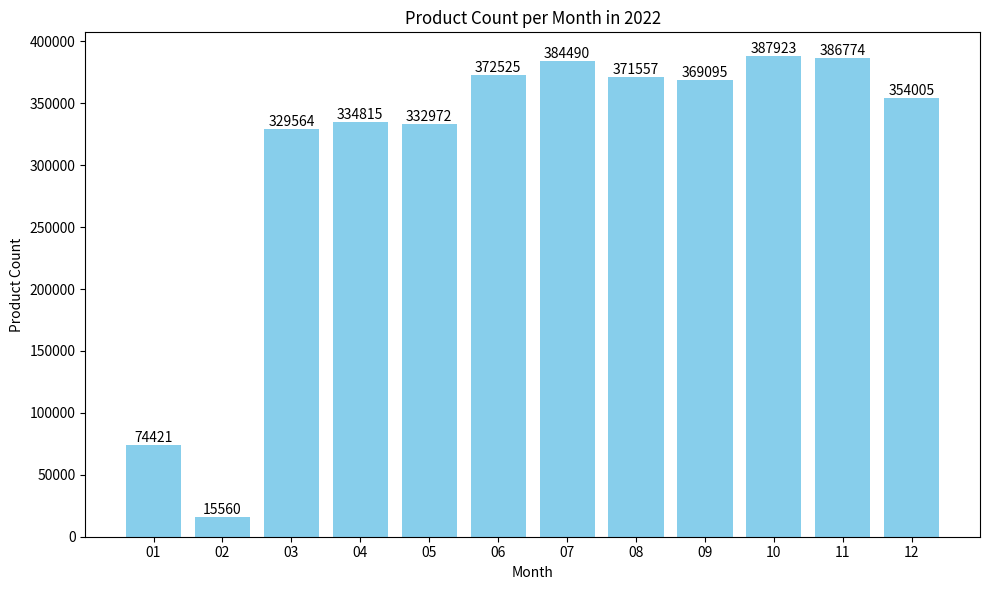

In [ ]:
# 製作成 DataFrame
monthly_counts_df = pd.DataFrame(list(monthly_counts.items()), columns=['Month', 'Product Count'])

# 根據月份字串排序
month_order = {
    '01': 1, '02': 2, '03': 3, '04': 4,
    '05': 5, '06': 6, '07': 7, '08': 8,
    '09': 9, '10': 10, '11': 11, '12': 12
}

# 將月份轉換成對應的數字，並根據數字排序
monthly_counts_df['Month Number'] = monthly_counts_df['Month'].map(month_order)
monthly_counts_df = monthly_counts_df.sort_values('Month Number')

# 繪製成圖表
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts_df['Month'], monthly_counts_df['Product Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Product Count')
plt.title('Product Count per Month in 2022')
plt.tight_layout()

bars = plt.bar(monthly_counts_df['Month'], monthly_counts_df['Product Count'], color='skyblue')
# 在每個長條上加上數字標籤
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Preprocessing1

## 整理資料
將 商品資料-2022_all.csv 的 'category' 欄位保留文字，並且刪除正則化後 'name' 為空的值。最終結果如下：

- 有 228,854 個空的正則化商品名稱。
- 剩餘 3,484,847 個有效商品名稱。

共計 3,484,847 筆資料已被儲存至 "datasets/updated_commodity_data.csv"

In [ ]:
data_count = 0
no_name_count = 0
total_amount_too_large_count = 0

category_count = {}

商品正則化（去除非中字元）

In [ ]:
def rename(name):
    # 替換符合特定格式的字串
    pattern = r"第 \d+ 標 \(\d+/\d+\)"
    name = re.sub(pattern, '', name)

    # 提取中文字符
    name_pattern = re.compile(r'[\u4e00-\u9fa5]+')
    normalized_name = ''.join(re.findall(name_pattern, name))
    return normalized_name

In [ ]:
# 讀取CSV檔案，提取category欄位的值並加入set中
with open(ALL_CSV_DATA_PATH, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    fieldnames = csv_reader.fieldnames
    updated_rows = []
    for row in csv_reader:
        category = row['category']
        name = rename(row['name'])
        total_amount = row['total_amount']
        price = row['price']
        # 去除方括號和引號，保留CATEGORY
        category = category.strip("[]").replace("'", "")
        # 如果category欄位為空，印出該商品的name
        if not category:
            print(f"No category found for product: {row}")
        elif not name:
            no_name_count += 1
            print(f"{row['id']} | {row['time']}: {row['name']}")
        elif int(total_amount) >= 9999999 or int(total_amount) < 1 or int(price) > 999999:
            total_amount_too_large_count += 1
        else:  # 更新category欄位
            data_count += 1
            row['category'] = category
            row['total_amount'] = row['total_amount'].replace('-', '')
            updated_rows.append(row)

            if category in category_count:
                category_count[category] += 1
            else:
                category_count[category] = 1

Streaming output truncated to the last 5000 lines.
9454225 | 2022-04-26 09: 277
9454265 | 2022-04-26 09: 161
9454322 | 2022-04-26 10: 第 005 標 (4/26)
9454336 | 2022-04-26 10: 第 005 標 (4/26)
9454641 | 2022-04-26 10: 第 202 標 (4/26)
9454744 | 2022-04-26 10: 第 205 標 (4/26)
9455110 | 2022-04-26 10: 第 012 標 (4/26)168+1
9455378 | 2022-04-26 11: 第 001 標 (4/26)jum
9455382 | 2022-04-26 11: 第 001 標 (4/26)
9455441 | 2022-04-26 11: 第 002 標 (4/26)
9455546 | 2022-04-26 11: 第 219 標 (4/26)
9455549 | 2022-04-26 11: 第 002 標 (4/26)set vay
9455608 | 2022-04-26 11: 第 001 標 (4/26)
9455660 | 2022-04-26 11: 第 220 標 (4/26)
9455736 | 2022-04-26 11: 第 222 標 (4/26)
9455821 | 2022-04-26 11: 第 003 標 (4/26)
9455932 | 2022-04-26 11: 第 003 標 (4/26)se vay bo
9456030 | 2022-04-26 11: 第 004 標 (4/26)
9456062 | 2022-04-26 11: 第 004 標 (4/26)co do
9456101 | 2022-04-26 11: 第 005 標 (4/26)
9465609 | 2022-04-26 15: 10402
9456719 | 2022-04-26 12: 第 201 標 (4/26)
9456633 | 2022-04-26 12: 第 006 標 (4/26)
9456667 | 2022-04-26 12: 第 229 

In [ ]:
print(f'價格不合理：{total_amount_too_large_count} 筆資料')
print(f'刪除非中字：{no_name_count + total_amount_too_large_count} 筆資料')
print(f'剩餘：{data_count} 筆資料')

價格不合理：86755 筆資料
刪除非中字：498400 筆資料
剩餘：3215301 筆資料


合併重新分類後的檔案一共有 44 個類別，因為加上期中模型（蝦皮類別），所以在這邊把類別壓縮回 23 類

In [ ]:
mapping = {
    'UNKNOWN': '其他類別',
    '保健': '美妝保健',
    '女生包包/精品': '女生包包、精品',
    '女鞋': '男女鞋',
    '嬰幼兒童裝童鞋': '嬰幼童與母親',
    '家用電器': '家電影音',
    '影音': '家電影音',
    '愛好與收藏品': '娛樂、收藏',
    '戶外與運動用品': '戶外、旅行',
    '手錶': '飾品、配件',
    '文具、美術用具': '文創商品',
    '旅行相關用品/行李箱': '戶外、旅行',
    '時尚配件': '飾品、配件',
    '機車類': '汽機車零件百貨',
    '母嬰用品': '嬰幼童與母親',
    '汽車類': '汽機車零件百貨',
    '男生包包': '男生包包與配件',
    '男鞋': '男女鞋',
    '相機&空拍機': '娛樂、收藏',
    '美妝保養': '美妝保健',
    '電腦與周邊配件': '3C與筆電'
}

for data in updated_rows:
    if data['category'] in mapping:
        data['category'] = mapping[data['category']]

In [ ]:
# 從商品資料中，獲取所有「類別（category）」集合
categories_set = set()

for data in updated_rows:
    categories_set.add(data['category'])

print(categories_set)
print(len(categories_set))

{'書籍及雜誌期刊', '美食、伴手禮', '嬰幼童與母親', '運動、健身', '家電影音', '美妝保健', '其他類別', '飾品、配件', '手機平板與周邊', '電玩、遊戲', '男生包包與配件', '居家生活', '女生包包、精品', '男生衣著', '3C與筆電', '服務、票券', '戶外、旅行', '寵物', '男女鞋', '汽機車零件百貨', '女生衣著', '娛樂、收藏', '文創商品'}
23


In [ ]:
# 將更新後的資料寫回CSV檔案
with open(UPDATED_ALL_CSV_DATA_PATH, 'w', encoding='utf-8', newline='') as updated_file:
    writer = csv.DictWriter(updated_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(updated_rows)

## 儲存類別
計算所有 'category'，並將其輸出成「datasets/categories.json」。總共包含 23 個大類。

In [ ]:
with open(CATEGORIES_JSON_PATH, 'w') as file:
    json.dump(list(categories_set), file)

## 載入圖表所需資料

In [ ]:
p1 = pd.read_csv(ALL_CSV_DATA_PATH)
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713701 entries, 0 to 3713700
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              int64 
 1   time            object
 2   commodity_id    int64 
 3   name            object
 4   total_quantity  int64 
 5   price           int64 
 6   total_amount    int64 
 7   category        object
dtypes: int64(5), object(3)
memory usage: 226.7+ MB


In [ ]:
p2 = pd.read_csv(UPDATED_ALL_CSV_DATA_PATH)
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215301 entries, 0 to 3215300
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              int64 
 1   time            object
 2   commodity_id    int64 
 3   name            object
 4   total_quantity  int64 
 5   price           int64 
 6   total_amount    int64 
 7   category        object
dtypes: int64(5), object(3)
memory usage: 196.2+ MB


In [ ]:
category_count = p2['category'].value_counts().to_dict()
category_count

{'女生衣著': 688842,
 '居家生活': 346797,
 '美妝保健': 345947,
 '美食、伴手禮': 322108,
 '飾品、配件': 319163,
 '男生衣著': 205998,
 '男生包包與配件': 174834,
 '娛樂、收藏': 125466,
 '嬰幼童與母親': 105172,
 '寵物': 83228,
 '手機平板與周邊': 80170,
 '書籍及雜誌期刊': 69127,
 '男女鞋': 57645,
 '女生包包、精品': 53203,
 '汽機車零件百貨': 51171,
 '家電影音': 49968,
 '戶外、旅行': 46886,
 '3C與筆電': 34543,
 '服務、票券': 19563,
 '電玩、遊戲': 14295,
 '運動、健身': 13867,
 '文創商品': 6711,
 '其他類別': 597}

In [ ]:
data = p2[p2['category'] == '居家生活']
sorted_data = data.sort_values('total_amount', ascending=False)

In [ ]:
sorted_data

,id,time,commodity_id,name,total_quantity,price,total_amount,category
281444,8117577,2022-03-30 12,6888781,公主 0330 A02-(預購/免運)(5件組)醫療級治療床墊(180*200CM)*3+舒...,329,28888,9504152,居家生活
255192,7966227,2022-03-27 12,6850679,公主 0327 A01-(預購/免運)(4件)石墨烯枕*2+醫療級治療床墊超導石墨烯(180...,307,26800,8227600,居家生活
285608,8167428,2022-03-31 12,6902482,公主 0331 A02-(預購)(4件)2010諾貝爾物理獎-舒眠博士石墨烯枕*2+醫療級治...,306,25800,7894800,居家生活
3158372,9411216,2022-04-25 12,7226637,888 0425 A01-(預購)(免運)(限+1)舒眠博士石墨烯枕*6+醫療級治療床墊*2...,146,47500,6935000,居家生活
285614,8168220,2022-03-31 12,6902954,公主 0331 A03-(預購)(2件)-(預購)醫療級治療床墊 負電位超導石墨烯(180*...,327,19900,6507300,居家生活
...,...,...,...,...,...,...,...,...
2121166,16727230,2022-09-23 14,9276019,第 003 標 (9/23)台灣紅包25+1,1,1,1,居家生活
340537,9833437,2022-05-03 18,7337353,浩平手做景觀瓶 氣泡會慢慢消,1,1,1,居家生活
2712269,12005816,2022-06-17 07,7938005,第 010 標 (6/17) 下午場 第10個打1元的,1,1,1,居家生活
1896945,15723791,2022-09-02 03,8727160,盧俊陞 0814 A02-(一個臉書帳號限+1，超額刪單不通知)圓形珪藻土杯墊(2入)(10...,1,1,1,居家生活


## [圖表] 各類別文字雲

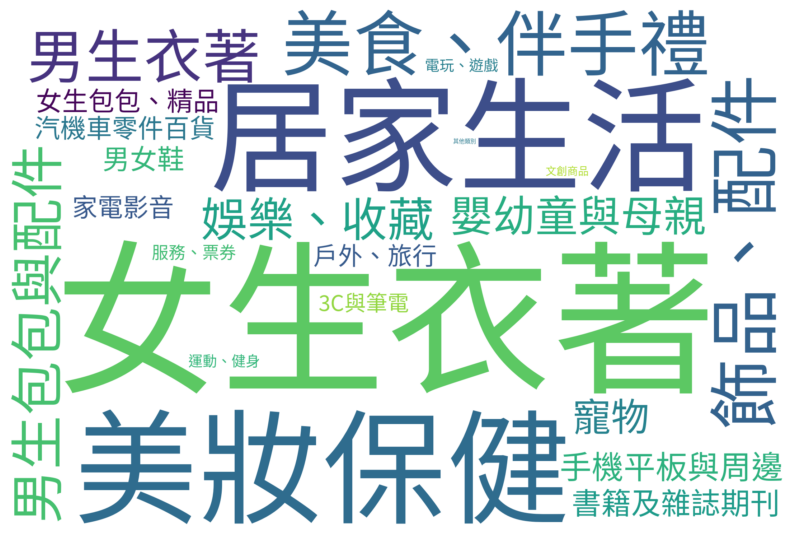

In [ ]:
font = 'SourceHanSansTW-Regular.otf'

# 按類別計算商品數量
category_count = p2['category'].value_counts()

# 建立文字雲物件，設定文字大小以反映商品數量
wordcloud = WordCloud(width=2160, height=1440, background_color='white',font_path=font).generate_from_frequencies(category_count)

# 繪製文字雲
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
category_percentage = category_count / len(p2) * 100
category_percentage

女生衣著       21.423873
居家生活       10.785833
美妝保健       10.759397
美食、伴手禮     10.017973
飾品、配件       9.926380
男生衣著        6.406803
男生包包與配件     5.437562
娛樂、收藏       3.902154
嬰幼童與母親      3.270985
寵物          2.588498
手機平板與周邊     2.493390
書籍及雜誌期刊     2.149939
男女鞋         1.792834
女生包包、精品     1.654682
汽機車零件百貨     1.591484
家電影音        1.554069
戶外、旅行       1.458215
3C與筆電       1.074332
服務、票券       0.608434
電玩、遊戲       0.444593
運動、健身       0.431282
文創商品        0.208721
其他類別        0.018567
Name: category, dtype: float64

## [圖表] 各類別總銷售額長條圖

1. 包含 23 個類別的銷售額進行比較

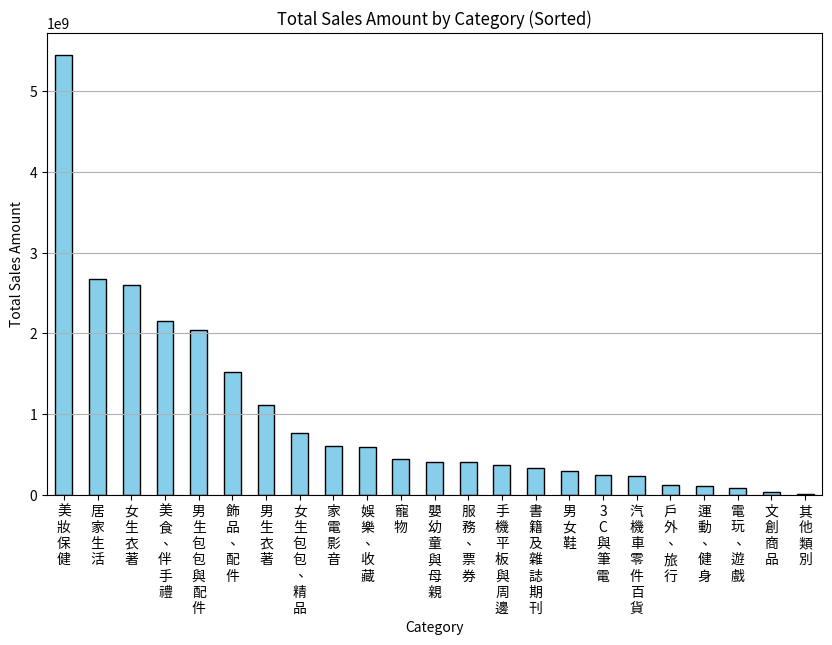

In [ ]:
p2['category'] = [category.replace(' ', '').strip() for category in p2['category']]
p2['category'] = [category.replace('\n', '').strip() for category in p2['category']]
p2['category'] = [category.replace('', '\n').strip() for category in p2['category']]

# 根據商品類別（category）對 total_amount 進行加總
category_sales = p2.groupby('category')['total_amount'].sum()

# 根據 total_amount 對 category_sales 進行排序
sorted_category_sales = category_sales.sort_values(ascending=False)

# 製作柱狀圖
plt.figure(figsize=(10, 6))
sorted_category_sales.plot(kind='bar', color='skyblue', edgecolor='black')  # 設定柱狀圖的顏色和邊線顏色
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Category (Sorted)')
plt.xticks(rotation=0)  # 若類別名稱太長，可以調整 x 軸標籤的角度
plt.grid(axis='y')  # 只在 y 軸上顯示格線
plt.show()

In [ ]:
p2['category'] = [category.replace('\n', '').strip() for category in p2['category']]
# 根據商品類別（category）對 total_amount 進行加總
category_sales = p2.groupby('category')['total_amount'].sum()
category_sales

category
3C與筆電       235883115
其他類別         12184204
女生包包、精品     766015087
女生衣著       2594870157
娛樂、收藏       587078499
嬰幼童與母親      404512288
家電影音        600422150
寵物          434994879
居家生活       2673536114
戶外、旅行       117528593
手機平板與周邊     371107048
文創商品         31462181
書籍及雜誌期刊     324030503
服務、票券       397694303
汽機車零件百貨     223592148
男女鞋         297292253
男生包包與配件    2039075947
男生衣著       1114900162
美妝保健       5454169630
美食、伴手禮     2146693402
運動、健身       106136374
電玩、遊戲        78277283
飾品、配件      1512934585
Name: total_amount, dtype: int64

## [圖表] 各類別總銷售額比圓餅圖

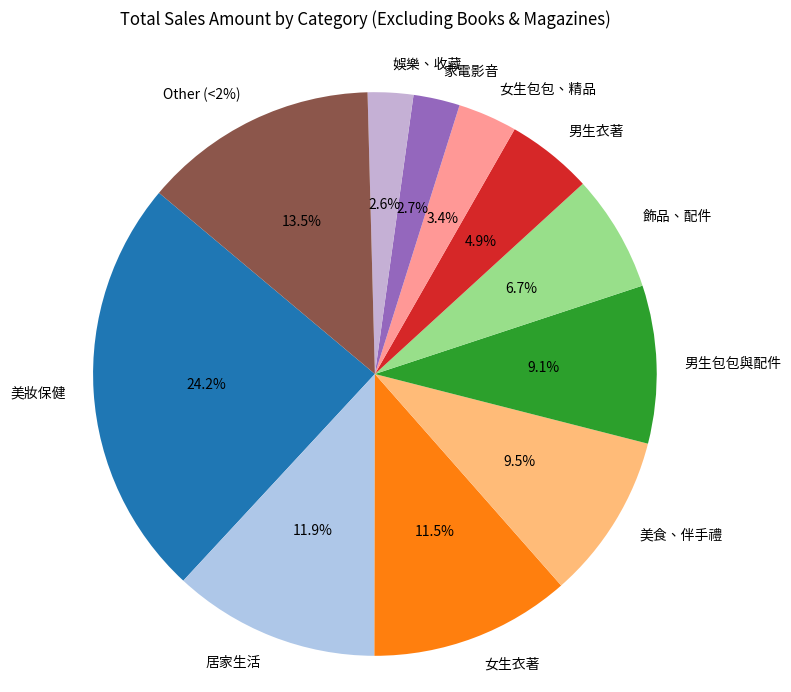

In [ ]:
p2['category'] = [category.replace('\n', '').strip() for category in p2['category']]

filtered_data = p2
category_sales = filtered_data.groupby('category')['total_amount'].sum()

# 根據銷售額排序
category_sales = category_sales.sort_values(ascending=False)

# 計算各類別銷售額的百分比
category_percentage = category_sales / category_sales.sum() * 100

# 選擇小於 2% 的類別，並將它們合併為一個類別
valid_categories = category_percentage[category_percentage >= 2]
other_categories = category_percentage[category_percentage < 2]
other_categories_sum = other_categories.sum()

# 將小於 2% 的類別合併為一個類別，名稱設定為空白
valid_categories['Other (<2%)'] = other_categories_sum

# 製作圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(valid_categories, labels=valid_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.suptitle('Total Sales Amount by Category (Excluding Books & Magazines)', y=0.95)  # 調整 y 值往上一點
plt.axis('equal')
plt.show()

In [ ]:
sales = p2.groupby('category')['total_amount'].sum()
category_percentage = sales / sales.sum() * 100

# 將 Series 轉換為 DataFrame
df = pd.DataFrame(category_percentage)
df['total_amount'] = df['total_amount'].apply(lambda x: f'{x:.2f}%')

# 顯示 DataFrame
df = df.sort_values(by='total_amount', ascending=False)
df

,total_amount
category,
美食、伴手禮,9.53%
男生包包與配件,9.05%
飾品、配件,6.72%
男生衣著,4.95%
女生包包、精品,3.40%
美妝保健,24.21%
家電影音,2.67%
娛樂、收藏,2.61%
居家生活,11.87%


## [圖表] 商品單價直方圖

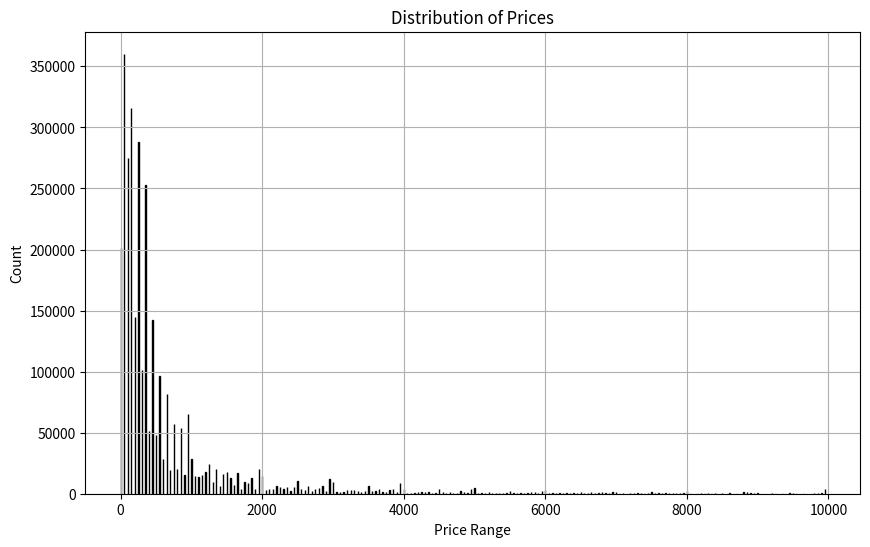

In [ ]:
# 假設價格範圍為 0 到 10000 元，設定 bin 的範圍
price_range = range(0, 10001, 50)  # 以 50 元為一個區間

# 計算每個價格區間內的商品數量
price_counts, _ = np.histogram(p2['price'], bins=price_range)

# 製作直方圖
plt.figure(figsize=(10, 6))
plt.bar(price_range[:-1], price_counts, width=5, color='skyblue', edgecolor='black')  # 設定直方圖的區間寬度和顏色
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Prices')
plt.grid(True)
plt.show()

## [圖表] 各類別商品數量長條圖

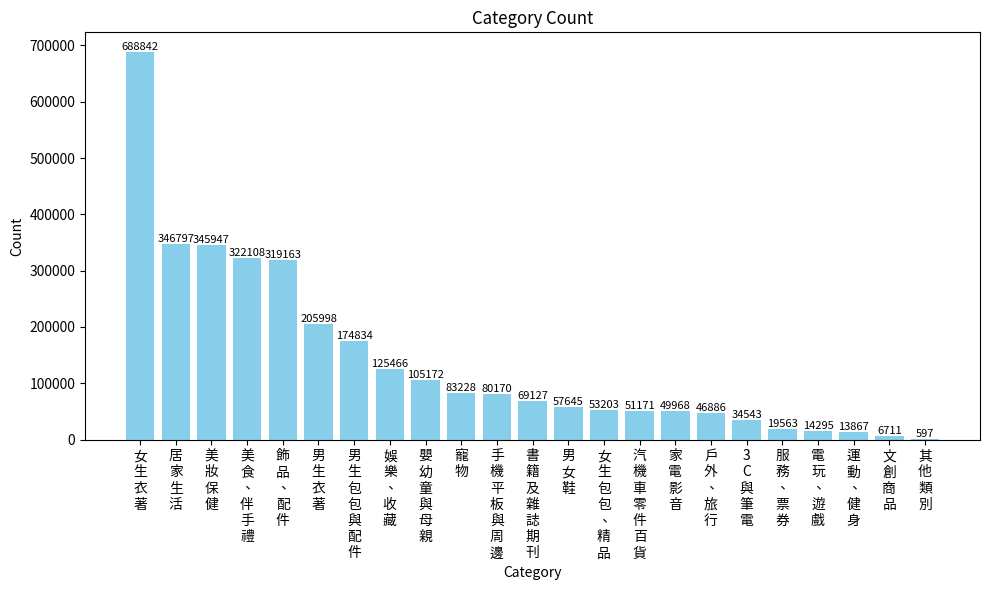

In [ ]:
# 將 category_count 字典按數量排序
sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_categories)
categories = [category.replace('', '\n').strip() for category in categories]

# 繪製成圖表
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count')
plt.xticks(rotation=0)
plt.tight_layout()

bars = plt.bar(categories, counts, color='skyblue')
# 在每個長條上加上數字標籤
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=8)

# 顯示圖表
plt.show()

## [圖表] 各類別商品數量比圓餅圖

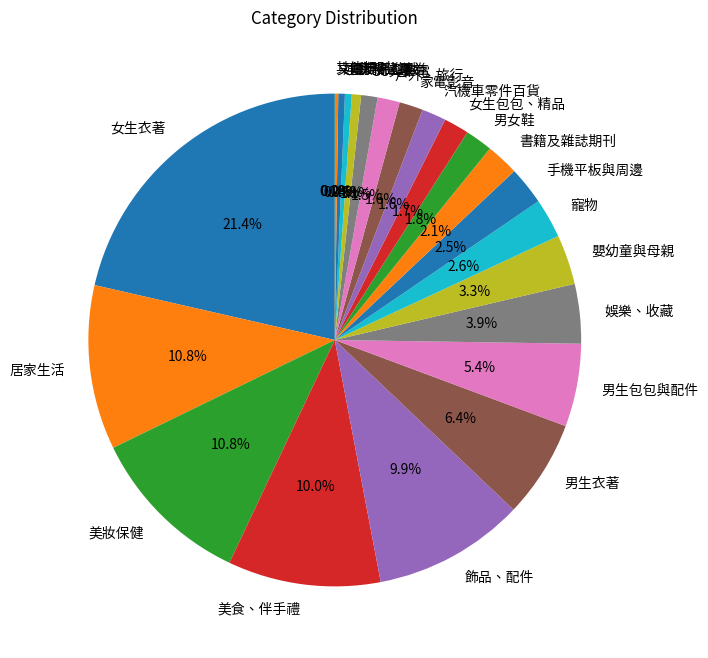

In [ ]:
categories = [category.replace('\n', '').strip() for category in categories]

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')  # 圖表標題

# 顯示圓餅圖
plt.show()

# Preprocessing2

## 讀取資料
從 "datasets/updated_commodity_data.csv" 取出所有商品資料，以及取出 "datasets/categories.json" 的 categories_list

並新增 *'month'*、*'day'* 兩個欄位


決定輸出資料的 GMT 時區（只有 '0', '8' 可以選）

In [ ]:
# 讀取 JSON 檔案並存成 categories_list 變數
with open(CATEGORIES_JSON_PATH, 'r') as file:
    categories_list = json.load(file)

categories_set = set(categories_list)

# 顯示讀取後的 categories_list
categories_list

['書籍及雜誌期刊',
 '美食、伴手禮',
 '嬰幼童與母親',
 '運動、健身',
 '家電影音',
 '美妝保健',
 '其他類別',
 '飾品、配件',
 '手機平板與周邊',
 '電玩、遊戲',
 '男生包包與配件',
 '居家生活',
 '女生包包、精品',
 '男生衣著',
 '3C與筆電',
 '服務、票券',
 '戶外、旅行',
 '寵物',
 '男女鞋',
 '汽機車零件百貨',
 '女生衣著',
 '娛樂、收藏',
 '文創商品']

In [ ]:
# 讀取CSV檔案轉換成DataFrame
df = pd.read_csv(UPDATED_ALL_CSV_DATA_PATH)
df

,id,time,commodity_id,name,total_quantity,price,total_amount,category
0,7797696,2022-03-24 02,4824247,微笑戒指,1,542,542,飾品、配件
1,7157940,2022-03-11 08,4824253,微笑上衣,3,399,1197,女生衣著
2,7797697,2022-03-24 02,4929064,杯子,1,599,599,居家生活
3,7797136,2022-03-24 02,5258951,就醬中樂透 商品,2,1000,2000,服務、票券
4,6957934,2022-03-07 04,5660889,膠囊式護髮油50粒1罐,1,160,160,美妝保健
...,...,...,...,...,...,...,...,...
3215296,6662821,2022-02-28 15,6493512,96.WM37-NAUTICA落日帆船短踢(粉)(XS45 S47 M49 L51 XL55...,14,666,9324,手機平板與周邊
3215297,6663028,2022-02-28 15,6493596,97.VZ10-US POLO 桃黑配色輕巧時尚鞋(23CM)(建議大一號)(無鞋盒) 10...,1,1000,1000,男女鞋
3215298,6663050,2022-02-28 15,6493605,98.WE42-TOMMY水洗渲染懶人鞋(天空藍)(建議大半號)(6-23) 1788+1,1,1788,1788,女生衣著
3215299,6663076,2022-02-28 15,6493620,99.VU19-UA BGS X LEVEL SCRAMJET 2藍迷彩運動鞋(黑藍)(版型...,1,1288,1288,男女鞋


## 處理時間
依照不同時間切分四個時段（time_period）：
- 01~06 -> A時段
- 07~12 -> B時段
- 13~18 -> C時段
- 19~00 -> D時段

In [ ]:
TIME_ZONE = '0'
# TIME_ZONE = '8'

In [ ]:
def transfer_timezone(df, gmt = '0'):
    # 將 time 欄位轉換成 datetime 格式
    df['time'] = pd.to_datetime(df['time'])

    if gmt == '8':
        gmt8 = timezone('Asia/Taipei')
        df['time'] = df['time'].dt.tz_localize('GMT').dt.tz_convert(gmt8)
    else:
        gmt0 = timezone('Etc/GMT')
        df['time'] = df['time'].dt.tz_localize(gmt0)

    # 建立 month 和 day 欄位
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day

    # 建立 time_period 欄位
    conditions = [
        (df['time'].dt.hour >= 1) & (df['time'].dt.hour <= 6),
        (df['time'].dt.hour >= 7) & (df['time'].dt.hour <= 12),
        (df['time'].dt.hour >= 13) & (df['time'].dt.hour <= 18),
        (df['time'].dt.hour >= 19) | (df['time'].dt.hour == 0)
    ]

    choices = ['A', 'B', 'C', 'D']

    # 使用 .loc 進行條件判斷
    df.loc[(conditions[0]), 'time_period'] = 'A'
    df.loc[(conditions[1]), 'time_period'] = 'B'
    df.loc[(conditions[2]), 'time_period'] = 'C'
    df.loc[(conditions[3]), 'time_period'] = 'D'

    return df

df = transfer_timezone(df, TIME_ZONE)
df

,id,time,commodity_id,name,total_quantity,price,total_amount,category,month,day,time_period
0,7797696,2022-03-24 02:00:00+00:00,4824247,微笑戒指,1,542,542,飾品、配件,3,24,A
1,7157940,2022-03-11 08:00:00+00:00,4824253,微笑上衣,3,399,1197,女生衣著,3,11,B
2,7797697,2022-03-24 02:00:00+00:00,4929064,杯子,1,599,599,居家生活,3,24,A
3,7797136,2022-03-24 02:00:00+00:00,5258951,就醬中樂透 商品,2,1000,2000,服務、票券,3,24,A
4,6957934,2022-03-07 04:00:00+00:00,5660889,膠囊式護髮油50粒1罐,1,160,160,美妝保健,3,7,A
...,...,...,...,...,...,...,...,...,...,...,...
3215296,6662821,2022-02-28 15:00:00+00:00,6493512,96.WM37-NAUTICA落日帆船短踢(粉)(XS45 S47 M49 L51 XL55...,14,666,9324,手機平板與周邊,2,28,C
3215297,6663028,2022-02-28 15:00:00+00:00,6493596,97.VZ10-US POLO 桃黑配色輕巧時尚鞋(23CM)(建議大一號)(無鞋盒) 10...,1,1000,1000,男女鞋,2,28,C
3215298,6663050,2022-02-28 15:00:00+00:00,6493605,98.WE42-TOMMY水洗渲染懶人鞋(天空藍)(建議大半號)(6-23) 1788+1,1,1788,1788,女生衣著,2,28,C
3215299,6663076,2022-02-28 15:00:00+00:00,6493620,99.VU19-UA BGS X LEVEL SCRAMJET 2藍迷彩運動鞋(黑藍)(版型...,1,1288,1288,男女鞋,2,28,C


In [ ]:
df.to_csv(TIME_PERIOD_ALL_CSV_DATA_PATH)

## 計算總額
計算各月份各時段的 *'total_amount'*，根據每個類別的每月份的各時段進行銷售額加總，最後得出 48 個 column，其命名規則為「月份+時段」，例如：1A, 5C, 10D ...

In [ ]:
# 根據月份和時間段創建新的行標籤
months = range(1, 13)
time_periods = ['A', 'B', 'C', 'D']

# 建立一個新的 DataFrame，索引為 categories_list，行為組合（月份+時間段）
columns = [f"{month}{time_period}" for month in months for time_period in time_periods]
result_df = pd.DataFrame(index=list(categories_set), columns=columns)

# 將行標籤解析為月份和時間段
for column in result_df.columns:
    month = int(column[:-1])
    time_period = column[-1]

    # 根據月份和時間段篩選資料並計算 total_amount 總和
    filtered_data = df[(df['month'] == month) & (df['time_period'] == time_period)]
    grouped_data = filtered_data.groupby('category')['total_amount'].sum()

    # 將計算結果填入新的 DataFrame
    result_df[column] = result_df.index.map(lambda x: grouped_data.get(x, 0))

# 顯示結果 DataFrame
result_df.head()

,1A,1B,1C,1D,2A,2B,2C,2D,3A,3B,...,10C,10D,11A,11B,11C,11D,12A,12B,12C,12D
運動、健身,815949,693000,762490,203741,462289,260599,288283,28083,1273165,2036963,...,6111212,175053,875599,1102421,6348643,169635,917750,1815288,6703578,115009
戶外、旅行,767450,816696,1559003,17470,215687,269762,298520,850,1442851,3902786,...,6630783,72726,1107338,3507034,6500456,87938,2672057,2777188,4707321,82521
美妝保健,23336299,43191066,52460807,230680,24425848,28808480,20155361,175748,68377019,85922506,...,381431715,11635222,116422531,153388076,407971245,7251980,88525647,149001592,268389920,6140560
男女鞋,1586898,1939246,2178948,247030,1438827,1139314,673865,38212,4498180,5740257,...,24763823,561464,4969974,6340210,26067322,1501081,5076301,5913771,19145370,867432
書籍及雜誌期刊,907884,1216705,2599271,35224,1907156,2619327,2460945,63738,2902745,5052841,...,12900592,385420,5247728,7226090,14384203,228384,2757979,15039762,13547197,286031


In [ ]:
result_df.to_excel(f'/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Alex/result_df_gmt{TIME_ZONE}.xlsx')

## [圖表] 每月各時段商品數量堆疊條形圖

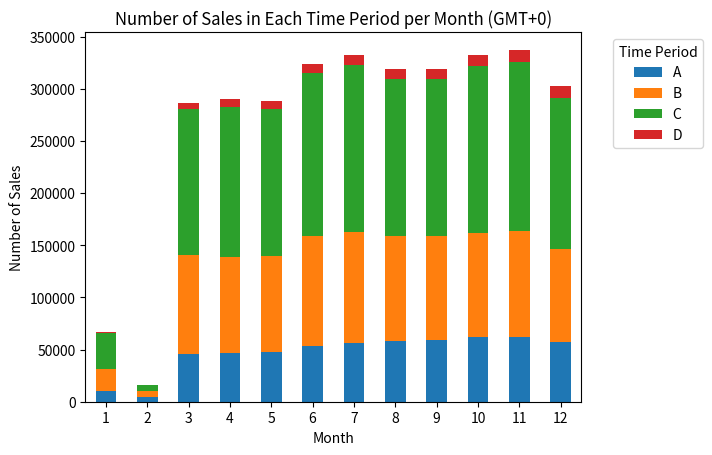

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month

# 根據月份和時間段進行分組並計數
grouped = df.groupby(['month', 'time_period']).size().unstack()

# 創建圖表
grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title(f'Number of Sales in Each Time Period per Month (GMT+{TIME_ZONE})')
plt.legend(title='Time Period', bbox_to_anchor=(1.05, 1), loc='upper left')